In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
adv=pd.read_csv("../Advertising.csv")
df=adv.copy()#dataseti kopyala

In [9]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [12]:
df=df.iloc[:,1:len(df)]#1.sutundan itibaren secim yapar 0.sutunu alma diyoruz
# df.drop("Unnamed: 0",axis=1)#Unnamed: 0	 sütünunu silmek drop,inplace=True ekle yoksa kopyasını döndürüyor datasetin

In [13]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [35]:
#VERİ EKSİKMİ?  KONTROL ET
df.isnull().values.any()#EKSİK VERİ YOK # False

False

In [40]:
df.corr()#değişkenlerin korelasyonlarını incele, yani aralarındaki ikili ilişki grafiği
#TV DEĞİŞKENİ EN ANLAMLI SATIŞLARDA EN ETKİLİ DEĞİŞKEN OLDUĞU ANLAŞILIYOR,0.782224

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [41]:
import seaborn as sns

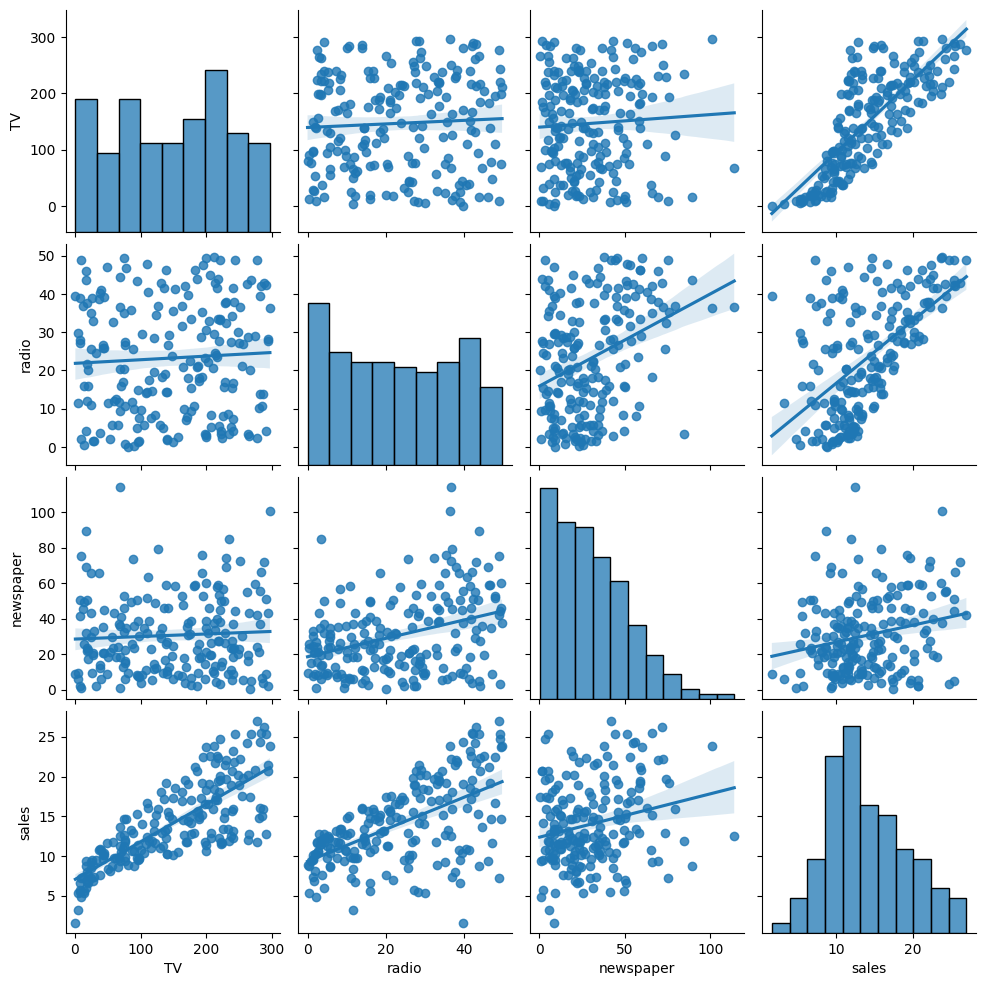

In [47]:
sns.pairplot(df,kind="reg")#TÜM DEĞİŞKENLERİ 2 ŞERLİ GRUPLA VE İLİŞKİ GRAFİĞKLERİNİ ÇİZ

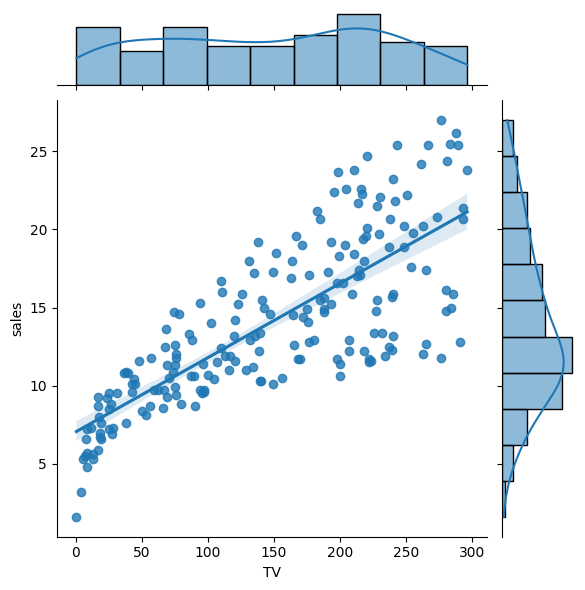

In [49]:
#jointplot() #Seçtiğin,iki değişken arasındaki ilişkiyi görselleştirmek için kullanılır. 
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

In [50]:
### Statsmodels ile modelleme

In [52]:
import statsmodels.api as sm

In [65]:
X=df[["TV"]]

In [66]:
X=sm.add_constant(X)

In [68]:
X[0:5]#Bağımsız değişken TV

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [69]:
y=df["sales"]

In [70]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [72]:
lm=sm.OLS(y,X)#Model kurma

In [73]:
model=lm.fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        21:10:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        22:03:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [79]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [80]:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [90]:
model.f_pvalue#Modelin anlamlılığı

1.4673897001945906e-42

In [95]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [96]:
model.fvalue

312.144994372713

In [99]:
print("f_pvalue: ", "%.2f" % model.fvalue)

f_pvalue:  312.14


In [84]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


C:\Users\efsan\AppData\Local\Temp\ipykernel_21376\665631458.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("tvalue: ", "%.2f" % model.tvalues[0:1])


In [85]:
model.rsquared_adj

0.6099148238341623

In [86]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [87]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [88]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


C:\Users\efsan\AppData\Local\Temp\ipykernel_21376\4231109319.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))


In [103]:
from sklearn.linear_model import LinearRegression

In [128]:
X = df[["TV"]]
y = df["sales"]
X = np.array(X).reshape(-1, 1)
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_ #b1 yani y=b0+b1x lineer denkleminde b1 katsayısını verir

array([0.04753664])

In [109]:
model.score(X,y)# R2 değeri

0.611875050850071

In [110]:
model.predict(X)[0:10]#modelin tahmin ettiği ilk 10 değer

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
#TAHMİN

In [114]:
#ornek:30 birim TV harcaması olduğundan satışların tahmini değeri ?
7.03+30*0.04 #8.23 kazanacak

8.23

In [131]:
X = df[["TV"]]
y = df["sales"]
X = np.array(X).reshape(-1, 1)
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_ #b1 yani y=b0+b1x lineer denkleminde b1 katsayısını verir

array([0.04753664])

In [127]:
model.predict([[30]])

array([8.45869276])

In [146]:
yeni_veriler=np.array([[8],[40],[50]])

In [147]:
model.predict(yeni_veriler)#TAHMİN İŞLEMİ SONUÇLARI

array([7.41288667, 8.93405917, 9.40942557])

In [ ]:
#ARTIKLAR VE MAKİNE Ö'DEKİ.ÖNEMİ

In [149]:
from sklearn.metrics import mean_squared_error, r2_score

In [157]:
lm = smf.ols("sales ~ TV", df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        22:04:28   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#mse tahmin edilen ve gerçek değerler arasındaki farkların karelerinin toplamının ortalması mse bunu hata hesaplamada kullan
mse=mean_squared_error(y,model.fittedvalues)
mse#ortalama birim başına yapılacak hata özeti
#rmse= karekök mse

10.512652915656757

In [168]:
lin_reg=LinearRegression() #X=tv, y=sales
model=lin_reg.fit(X,y)#Eğit

In [163]:
rmse=np.sqrt(mse)
rmse

3.2423221486546887

In [227]:
tahminler=lin_reg.predict(X)[0:50]# Tv nin ilk 10 değerini vererek satış tahmini yaptırıoyrum

In [229]:
y[0:50] # target değer ilk 50 değerin

0     22.1
1     10.4
2      9.3
3     18.5
4     12.9
5      7.2
6     11.8
7     13.2
8      4.8
9     10.6
10     8.6
11    17.4
12     9.2
13     9.7
14    19.0
15    22.4
16    12.5
17    24.4
18    11.3
19    14.6
20    18.0
21    12.5
22     5.6
23    15.5
24     9.7
25    12.0
26    15.0
27    15.9
28    18.9
29    10.5
30    21.4
31    11.9
32     9.6
33    17.4
34     9.5
35    12.8
36    25.4
37    14.7
38    10.1
39    21.5
40    16.6
41    17.1
42    20.7
43    12.9
44     8.5
45    14.9
46    10.6
47    23.2
48    14.8
49     9.7
Name: sales, dtype: float64

In [230]:
k_t=pd.DataFrame({"gercek_sales":y[0:50],"tahmin_sales":tahminler})
k_t

,gercek_sales,tahmin_sales
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [232]:
k_hata=k_t["gercek_sales"].sub(k_t["tahmin_sales"])#gercek ile tahmin hata farkı hesapla
k_t["k_hata"]=k_hata#k_hata isimli sutun olsutur ve soncuları ekle
k_t

,gercek_sales,tahmin_sales,k_hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [233]:
k_t["hata_kare"]=k_t["k_hata"]**2 #hatalarınn kareleri
k_t

,gercek_sales,tahmin_sales,k_hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [234]:
k_t["hata_kare"].sum()
#np.sum(k_t["hata_kare"])

467.28085278681135

In [235]:
np.mean(k_t["hata_kare"])

9.345617055736227

In [236]:
np.sqrt(np.mean(k_t["hata_kare"]))#hata_karenin ortalması

3.057060198251946

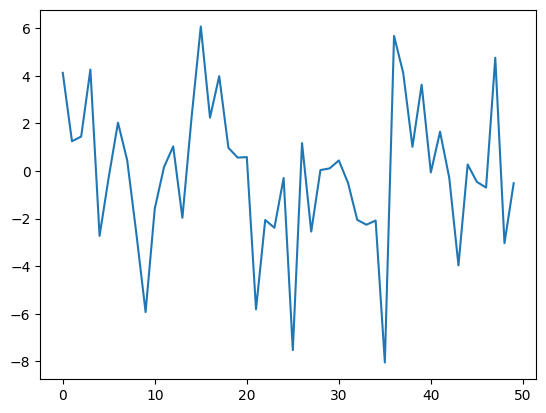

In [237]:
#HATAYI GRAFİĞE DÖK
plt.plot(k_t["k_hata"])
#plt.scatter(range(len(k_t)), k_t["k_hata"])
#sns.lineplot(data=k_t, x=k_t.index, y="k_hata")
#sns.scatterplot(data=k_t, x=k_t.index, y="k_hata")

In [6]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [7]:
X=df.drop("sales",axis=1)
y=df["sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
X_train.shape

(160, 3)

In [9]:
y_train.shape

(160,)

In [10]:
training = df.copy()

In [11]:
training.shape

(200, 4)

In [15]:
#STATS MODELS=> YORUMLAMA İŞLEMLERİ İÇİN,yada SCKİT LEARN KULLANABİLİRSİN

In [20]:
import statsmodels.api as sm

In [25]:
multiple_lr = sm.OLS(y_train, X_train)

In [26]:
model=multiple_lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):                   1.28e-137
Time:                        22:21:17   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


In [ ]:
## SCKİT LEARN  Modeli

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)


In [34]:
model.intercept_#SABİT KATSAYI
model.coef_#DİĞER KATSAYILAR BAĞIMSIZ DEĞİŞKENLERİN KATSAYISI

array([0.04472952, 0.18919505, 0.00276111])

In [ ]:
"""
Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?


"""

In [37]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [42]:
y_pred=model.predict(X_train)#satşın beklenen değeri

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(y_train,y_pred))

In [46]:
rmse# gercekdeğer-tahmin değer in farklarının karekökü yani eğitim hatası

1.644727765644337

In [49]:
#test hatası
rmse=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
rmse #test hatası yani modelin bilmediği değerler ile hatası

1.78159966153345

In [53]:
#MODEL TUNİNG/MODEL DOĞRULAMA olarak yapılıyor BURADA, çünkü parametre yok neredeyse çoklu doğrusal regresyon modelnide

In [51]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [76]:
X=df.drop("sales",axis=1)
y=df["sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [77]:
np.sqrt(mean_squared_error(y_train,y_pred)) #hata değeri burada 1.64 cıktı


1.644727765644337

In [78]:
model.score(X_train,y_train)

0.8957008271017818

In [73]:
#CROSS_VALİDATİON:modelde random_state değerini 144 felan yap parmaetre değiştikçe başraısı değişiyor,
#Bir modelin performansını değerlendirmek ve doğruluğunu ölçmek için kullanılan bir tekniktir. 

In [79]:
cross_val_score(model,X_train,y_train,cv=10,scoring="r2").mean()

0.7913548596916338

In [75]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")).mean() #eğitim verisinde,hata değeri gercekte 1.65 miş yani valide edilmiş hata verisi bu 

1.6513523730313335

In [71]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.846277882399709